In [1]:
# Example: reuse your existing OpenAI setup
from openai import OpenAI

# Point to the local server
client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")

completion = client.chat.completions.create(
  model="TheBloke/medalpaca-13B-GGUF/medalpaca-13b.Q3_K_S.gguf",
  messages=[
    {"role": "system", "content": "Always answer with yes, no, or maybe only"},
    {"role": "user", "content": "Introduce yourself."}
  ],
  temperature=0.7,
)

print(completion.choices[0].message.content)

OOOOOOOOOOO!
OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO!
“We are all a little crazy.”
It’s been one year since I first heard about them. And every time I hear that name, I think about you.
And when I do, I think about how lucky I am to have such a great friend like you.
There is no doubt in my mind that we will be together forever.
“I wish I could tell you that sometimes life just doesn’t make sense.”
“I don’t know what I was thinking when I first met you, but it doesn’t matter now.”
“It doesn’t matter how we met.”
“I think about you all the time.”
“When I hear your voice, I am transported back to a simpler time. A time before phones and Facebook.”
“There is something about you that I can’t put my finger on.”
“I don’t know what I was thinking when we first met, but it doesn’t matter now.”
“I wish I could tell you that sometimes life just doesn’t make sense.”
“When I hear your voice, I am taken back to a simpler time.”
“It doesn’t matter how we first crossed paths

In [8]:
import pandas as pd
test_df = pd.read_parquet('pubmedqa-labeled.parquet')

test_df

,pubid,question,context,long_answer,final_decision
0,21645374,Do mitochondria play a role in remodelling lac...,{'contexts': ['Programmed cell death (PCD) is ...,Results depicted mitochondrial dynamics in viv...,yes
1,16418930,Landolt C and snellen e acuity: differences in...,{'contexts': ['Assessment of visual acuity dep...,"Using the charts described, there was only a s...",no
2,9488747,"Syncope during bathing in infants, a pediatric...",{'contexts': ['Apparent life-threatening event...,"""Aquagenic maladies"" could be a pediatric form...",yes
3,17208539,Are the long-term results of the transanal pul...,{'contexts': ['The transanal endorectal pull-t...,Our long-term study showed significantly bette...,no
4,10808977,Can tailored interventions increase mammograph...,{'contexts': ['Telephone counseling and tailor...,The effects of the intervention were most pron...,yes
...,...,...,...,...,...
995,8921484,Does gestational age misclassification explain...,"{'contexts': ['After 34 weeks gestation, summa...",Gestational age misclassification is an unlike...,no
996,16564683,Is there any interest to perform ultrasonograp...,{'contexts': ['To evaluate the accuracy of ult...,Sonography has no place in the diagnosis of un...,no
997,23147106,Is peak concentration needed in therapeutic dr...,{'contexts': ['We analyzed the pharmacokinetic...,These results suggest little need to use peak ...,no
998,21550158,Can autologous platelet-rich plasma gel enhanc...,{'contexts': ['This investigation assesses the...,"The PRP group recorded reduced pain, swelling,...",yes


In [ ]:
completion = client.chat.completions.create(
  model="TheBloke/medalpaca-13B-GGUF/medalpaca-13b.Q3_K_S.gguf",
  messages=[
    {"role": "system", "content": "Always answer with yes, no, or maybe only"},
    {"role": "user", "content": "Introduce yourself."}
  ],
  temperature=0.7,
)

print(completion.choices[0].message.content)



In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Load your DataFrame here
# test_df = pd.read_parquet('path_to_your_file.pubmedqa-labeled.parquet')

client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")

# Simulating the LLM response, replace this function with actual API calls
def simulate_llm_response(question, context):
    completion = client.chat.completions.create(
    model="TheBloke/medalpaca-13B-GGUF/medalpaca-13b.Q4_K_M.gguf",
    messages=[
    {"role": "system", "content": f"Always answer with yes, no, or maybe only. Only have a one word response."},
    {"role": "user", "content": f"{context}. {question}. Only have a one word response with yes/no/maybe."}
    ],
    temperature=0.1,
    max_tokens=5,
    n=1
    )
    # This function should be replaced with the actual LLM request
    # For simulation, we'll randomly return 'yes', 'no', or 'maybe'
    return completion.choices[0].message.content

In [22]:
test_df.head(1)['question']

TypeError: object of type 'StringMethods' has no len()

{'contexts': array(['Programmed cell death (PCD) is the regulated death of cells within an organism. The lace plant (Aponogeton madagascariensis) produces perforations in its leaves through PCD. The leaves of the plant consist of a latticework of longitudinal and transverse veins enclosing areoles. PCD occurs in the cells at the center of these areoles and progresses outwards, stopping approximately five cells from the vasculature. The role of mitochondria during PCD has been recognized in animals; however, it has been less studied during PCD in plants.',
       'The following paper elucidates the role of mitochondrial dynamics during developmentally regulated PCD in vivo in A. madagascariensis. A single areole within a window stage leaf (PCD is occurring) was divided into three areas based on the progression of PCD; cells that will not undergo PCD (NPCD), cells in early stages of PCD (EPCD), and cells in late stages of PCD (LPCD). Window stage leaves were stained with the mitochondria

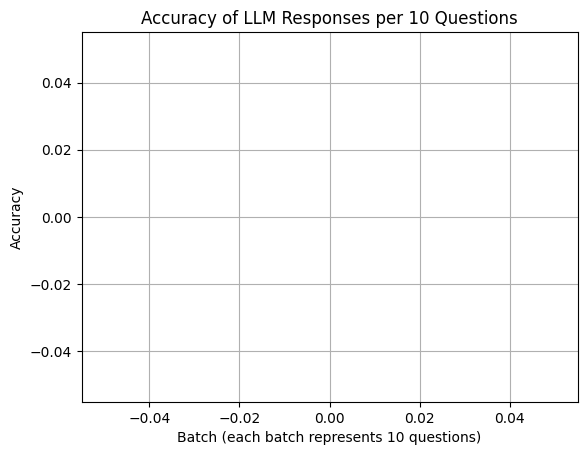

In [37]:
# Initialize variables
accuracies = []
correct_count = 0

# Iterate through the first 100 rows of the DataFrame
for index, row in test_df.head(1).iterrows():
    # Simulate sending request to the LLM and getting a response
    print(row['context'])
    print(row['question'])
    response = simulate_llm_response(row['question'], row['context'])
    print(response)
    # Check if the response matches the final decision
    if row['final_decision'] in response:
        correct_count += 1
    
    # Every 10 values, calculate the accuracy and reset the count
    if (index + 1) % 10 == 0:
        accuracy = correct_count / 10
        accuracies.append(accuracy)
        correct_count = 0  # Reset the count for the next batch

# Plotting the accuracies
plt.plot(accuracies, marker='o', linestyle='-')
plt.title('Accuracy of LLM Responses per 10 Questions')
plt.xlabel('Batch (each batch represents 10 questions)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()